# Sums of Random Variables

In this workbook we explore the sum of uncorrelated or, more strongly, independent random variables.  This leads to two of the main results bridging probability and statistics: the **Law of Large Numbers (LLN)** and the **Central Limit Theorem (CLT)**.

We have explored numerical results that lead to the LLNs several time sin the class, but let's do that again.  Also, let's look at some results that illustrate the CLT.

## Experiments Demonstrating the Law of Large Numbers
Let's generate the some iid random numbers from a given distribution and investigate the sample mean and sample variance behaivor.  Here we are generating realizations of the iid random variables $X_i(u)$ according to some distribution.  Then, we are forming the estimates of the mean and variance:

$\hat{M}_n(u) = \frac{1}{n} \sum_{i=1}^n X_i(u)$

$\hat{S}^2_n(u) = \frac{1}{n} \sum_{i=1}^n (X_i(u) - \hat{M}_n(u))^2$

In the following we plot sample realizations of these quantities for various distributions on $X_i(u)$.  


In [30]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats


def plot_means_vars(data, m, sigma_sq):
    (N_trials, N_samples_per_trial) = data.shape
    means = np.zeros((N_trials, N_samples_per_trial))
    vars = np.zeros((N_trials, N_samples_per_trial))
    for n in range(N_samples_per_trial):
        means[:, n] = np.mean(data[:, : n + 1], axis=1)  ## np.mean takes the arithmetic average
        vars[:, n] = np.var(data[:, : n + 1], axis=1)    ## np.var computes data-average squared deviation from the mean
    
    x_range = np.arange(N_samples_per_trial) + 1

    ### plot the sample mean paths
    plt.figure(figsize = (12, 9))
    for i in range(N_trials):
        plt.plot(x_range, means[i], linewidth = 0.5)
    plt.axhline(y = m, c = 'r', linewidth = 2)
    axes = plt.gca()
    axes.set_xlabel('number of samples')
    axes.set_ylabel('sample mean')
    plt.title(f'Sample Mean Paths: {N_trials} trials, mean = {m}')

    ### plot some histogram slices
    slices = [4, N_samples_per_trial // 4 - 1, N_samples_per_trial // 2 - 1, N_samples_per_trial - 1]
    N_plots = len(slices)
    fig, ax = plt.subplots(N_plots, sharex=True, figsize=(10,10))
    for i, n0 in enumerate(slices):
        _ = ax[i].hist(means[:, n0], bins=30, label = f'at {n0 + 1} samples')
        ax[i].legend()

    ### plot the sample variance paths
    plt.figure(figsize = (12, 9))
    for i in range(N_trials):
        plt.plot(x_range, vars[i], linewidth = 0.5)
    plt.axhline(y = sigma_sq, c = 'r', linewidth = 2)
    axes = plt.gca()
    axes.set_xlabel('number of samples')
    axes.set_ylabel('sample variance')
    plt.title(f'Sample Variance Paths: {N_trials} trials, variance = {sigma_sq}')

    ### plot some histogram slices
    slices = [4, N_samples_per_trial // 4 - 1, N_samples_per_trial // 2 - 1, N_samples_per_trial - 1]
    N_plots = len(slices)
    fig, ax = plt.subplots(N_plots, sharex=True, figsize=(10,10))
    for i, n0 in enumerate(slices):
        _ = ax[i].hist(vars[:, n0], bins=30, label = f'at {n0 + 1} samples')
        ax[i].legend()



### Binomial distribution
Let's first check this for the indivdual distribution being Binomial.  This is what we did in Lecture 1. 

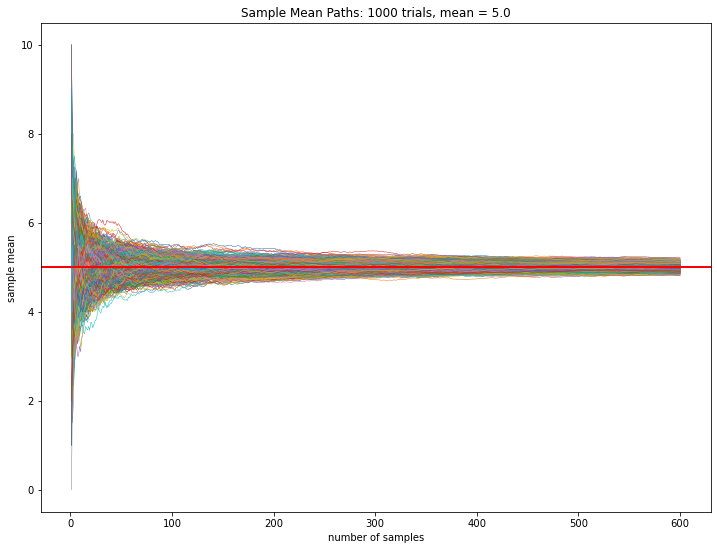

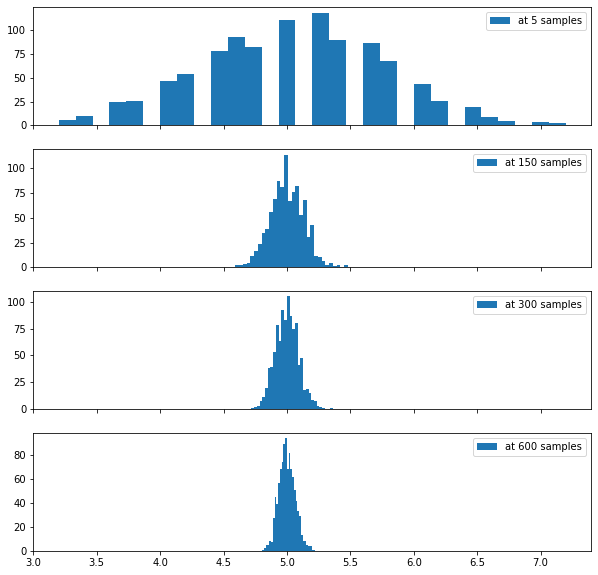

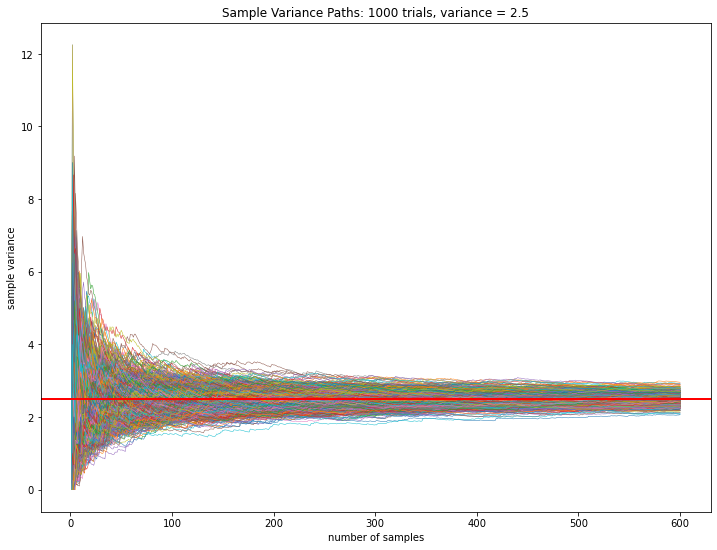

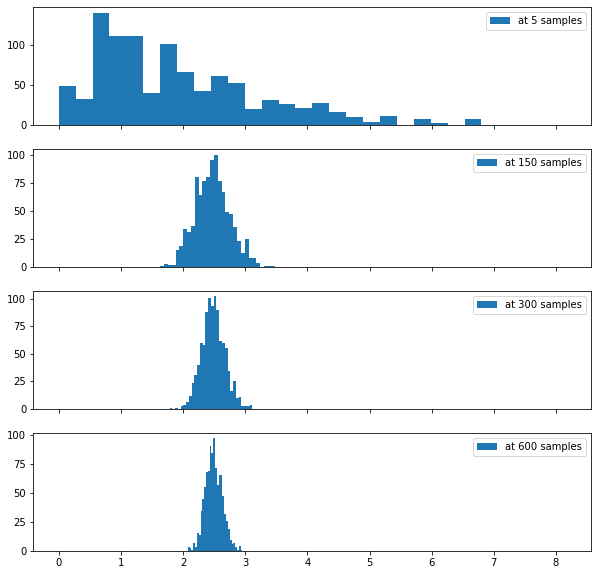

In [31]:
N_trials = 1000
N_samples_per_trial = 600

data = np.random.binomial(10, 0.5, (N_trials, N_samples_per_trial))
plot_means_vars(data, 10 * 0.5, 10 * 0.5 * 0.5)

Note that we see convergence of ttheeh smaple mean paths to the true (ensemble average) mean.  Furthermore, looking at histgrams at fixed values of $n$, we see that it follows a roughly Gaussian distribution with standard deviation that is decreasing with $n$.  

Similar results are obtained when looking at the sample variance.  Close inspection of the histograms for teh sample variance will indicate taht the distribution is not quite symmetric around teh actaul variance.  

### Gaussian Distribution
Let's repeat with a Gaussian distribution

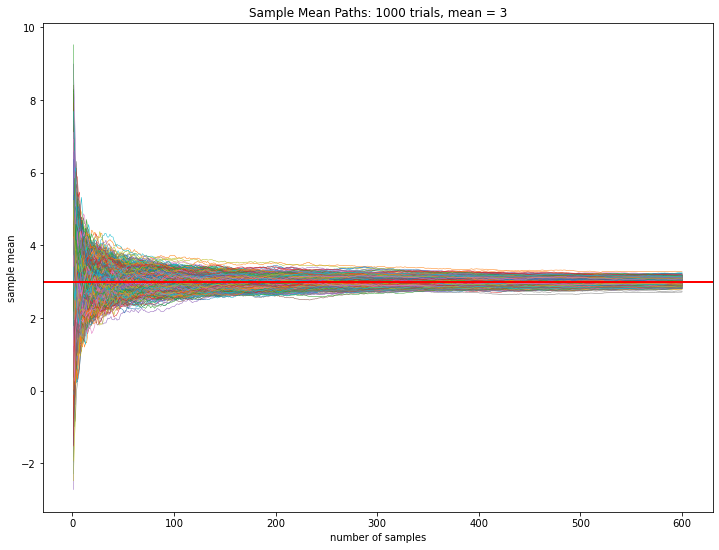

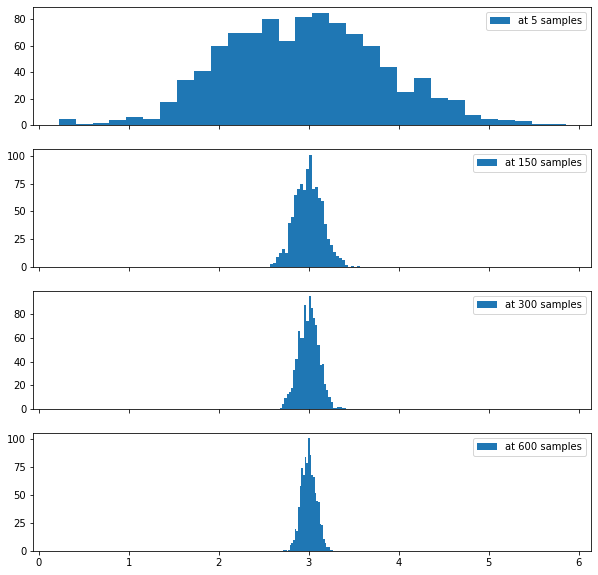

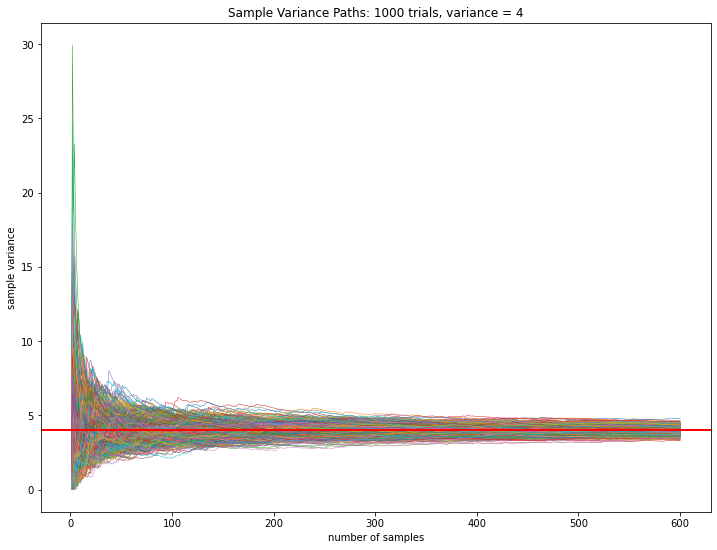

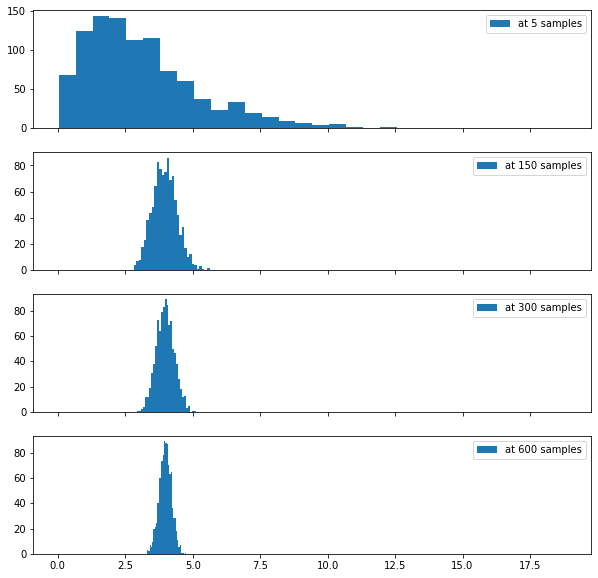

In [32]:
data = np.random.normal(3, 2, (N_trials, N_samples_per_trial))
plot_means_vars(data, 3, 4)

Again, same qualatative results.  

### Uniform Distribution

Let's try a uniform distribution

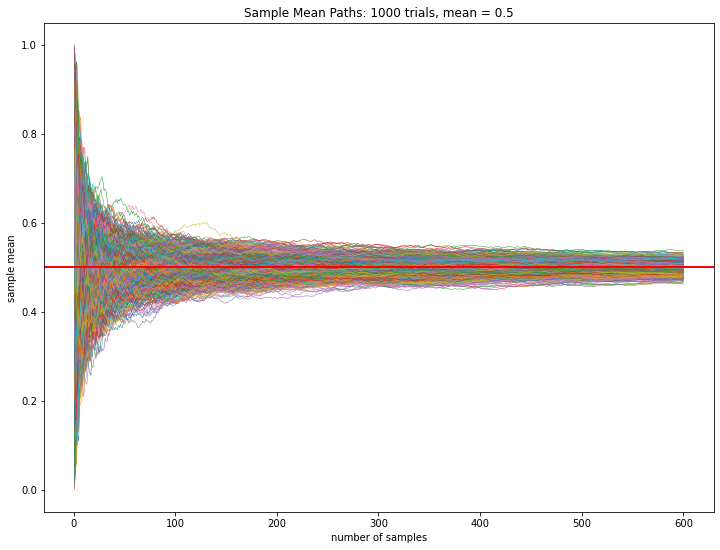

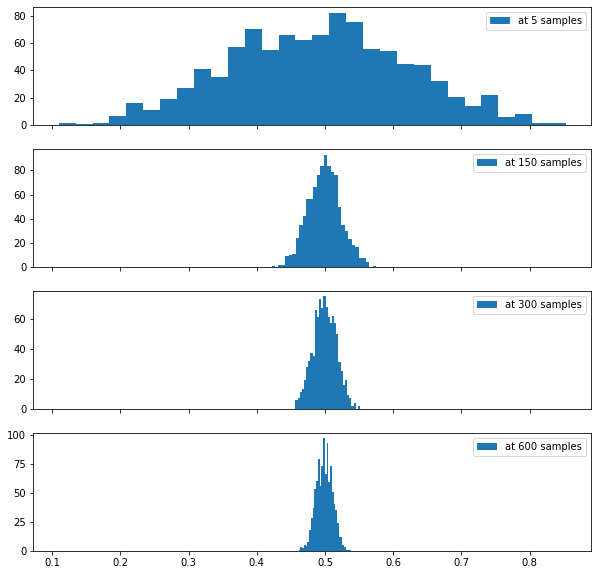

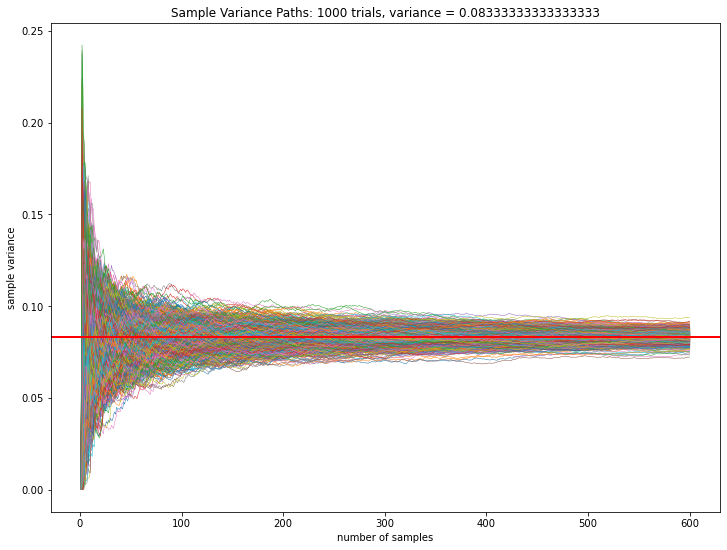

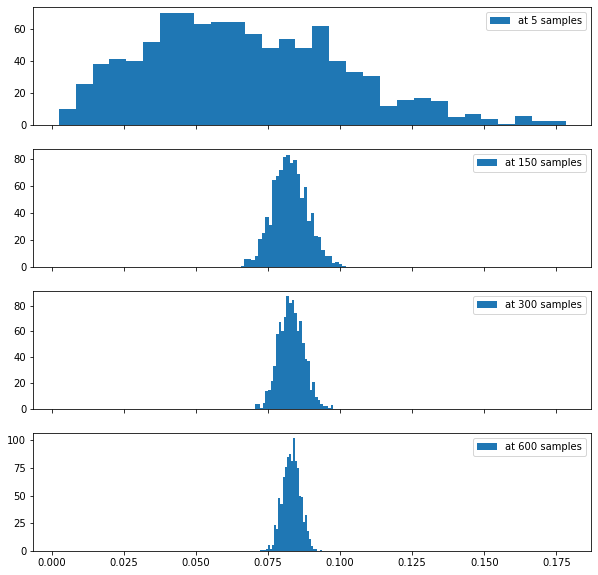

In [33]:
data = np.random.rand(N_trials * N_samples_per_trial)
data = data.reshape((N_trials, N_samples_per_trial))
plot_means_vars(data, 0.5, 1 / 12)

Same story.  Let's try an exponential distribution

## Exponential Distribution

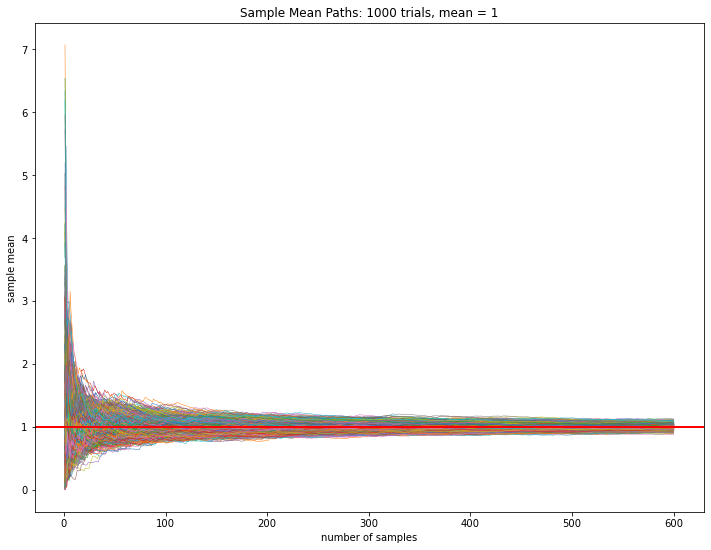

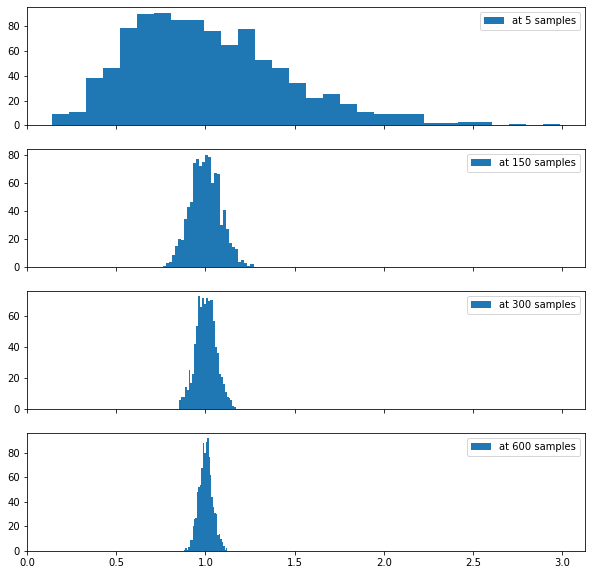

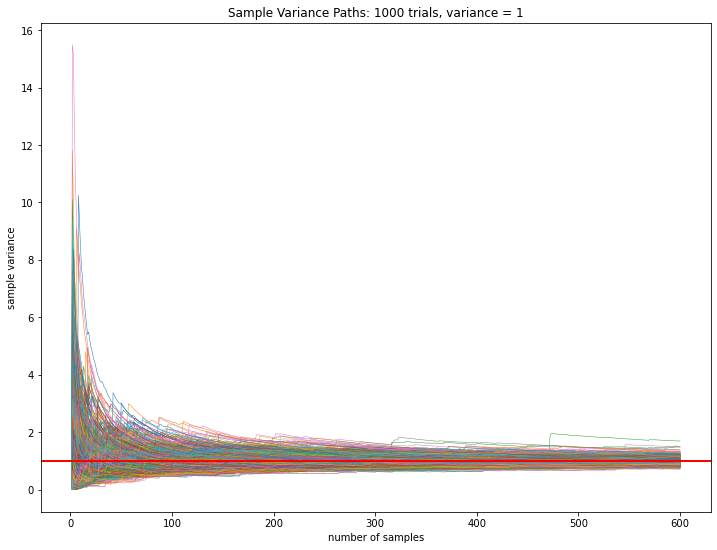

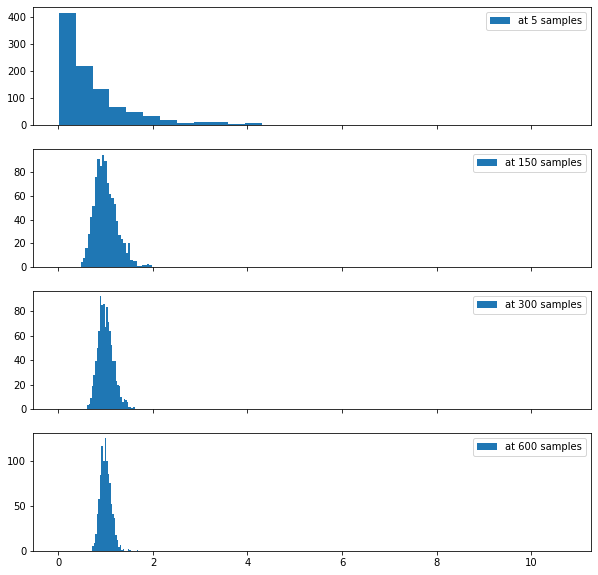

In [34]:
data = np.random.exponential(1, (N_trials, N_samples_per_trial))
plot_means_vars(data, 1, 1)

## Experiemnets Demonstrating the Central Limit Theorem

In lecture, we saw that the pdf/pmf of the sum of independent random variables is the convolution of the pdf/pmf of the summands.  This can be applied repeatedly, so that the pdf/pmf of the sum of $n$ iid random variables is the $n$-fold convolution of the indiviudal pdf/pmf.  Let's explore this with a few distributions.

In [46]:

def n_fold_convolution(pdf_pmf, N, discrete=False):
    convs = [pdf_pmf]
    for n in range(1, N):
        convs.append(np.convolve(convs[n - 1], pdf_pmf))
    
    fig, ax = plt.subplots(N, sharex=True, figsize=(10,10))
    for n in range(N):
        if discrete:
            ax[n].stem(convs[n], label = f'{n + 1} terms in sum')
        else:
            ax[n].plot(convs[n], label = f'{n + 1} terms in sum')
        ax[n].legend()

### Discrete Uniform Distribution (Die Roll)
Let's first try with a discrete uniform distribution over 

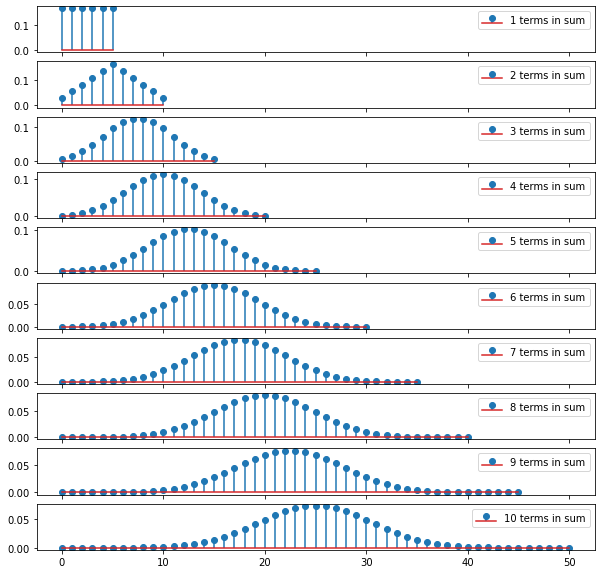

In [47]:
N = 10

pdf_pmf = np.ones(6) / 6
n_fold_convolution(pdf_pmf, N, discrete=True)

### Bernoulii Distribution
Ok, let's make this even simpler: let's use a Bernoulli distribution.

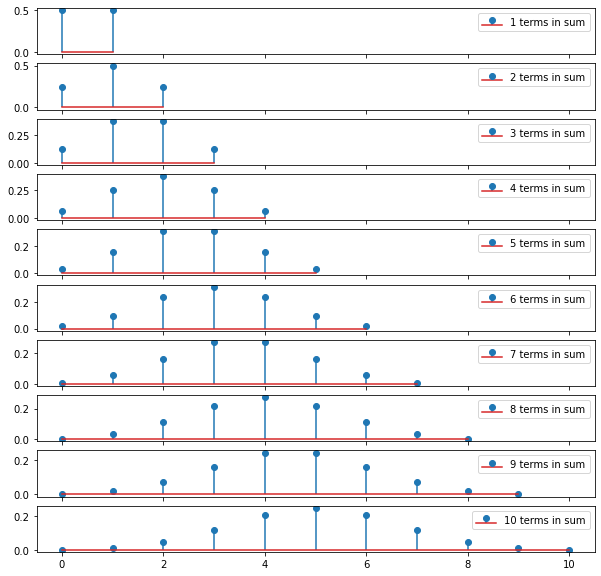

In [49]:
pdf_pmf = stats.bernoulli.pmf([0, 1], 0.5)
n_fold_convolution(pdf_pmf, N, discrete=True)

Well, the sum of Bernoullis is just a Bonomial!  So, the emergence of teh bell-curve is just the Gaussian approximation to the Binomial!

### Exponential Distribution

Let's try the Exponential distribution

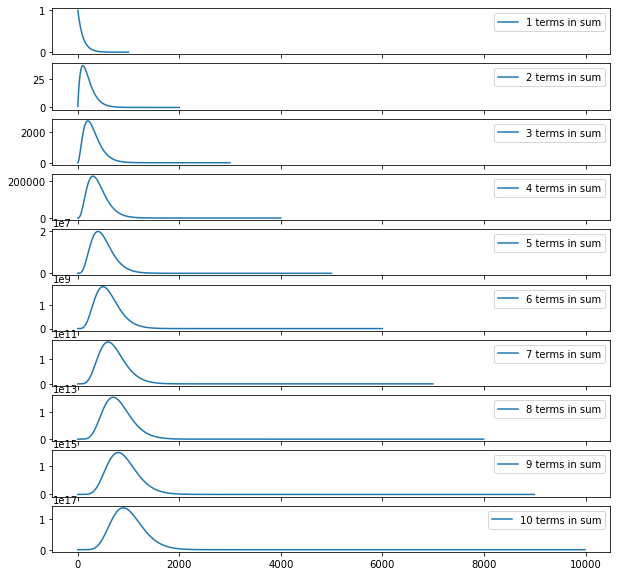

In [51]:
x_vals = np.arange(0, 10, 0.01)

pdf_pmf = stats.expon.pdf(x_vals)
n_fold_convolution(pdf_pmf, N)

OK, since everything seems to be trending towards a Guassian bell, what happens if we start with a Gaussian?

### Gaussian Distribution


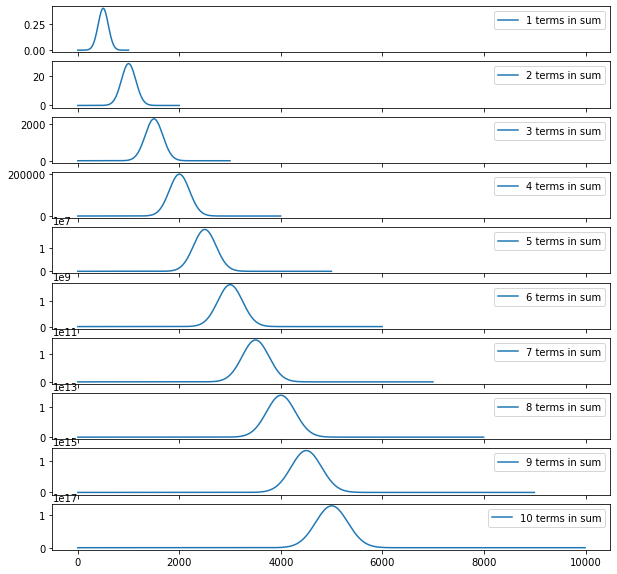

In [53]:
pdf_pmf = stats.norm.pdf(x_vals, 5, 1)
n_fold_convolution(pdf_pmf, N)


### A CLT-based Gaussian Random Number generator

Most numerical computing platforms have excellent Guassian random number generators.  Furthermore, we have seen method to convert a `Uniform[0,1]` random number generator to any distribution with the inverse cdf.  Here is a really simple way to generate Gaussians -- not preferred, but can be used as a sanity check as needed.  This is just to sum uniform random number generators.

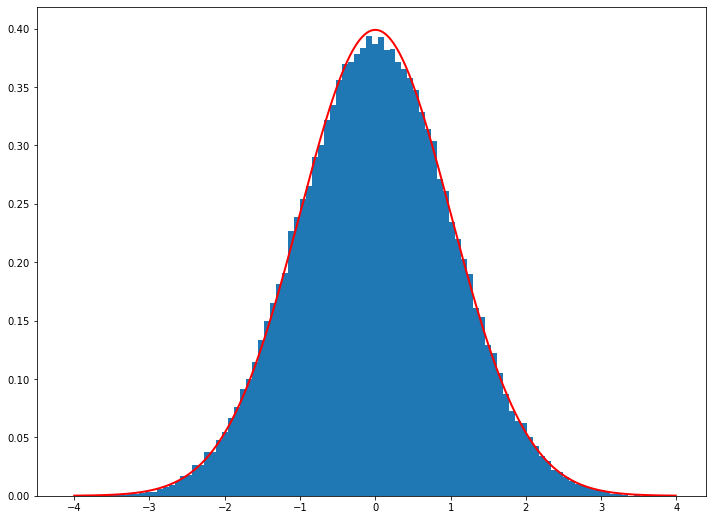

In [60]:
data = np.random.rand(1000000)
data = data.reshape((100000, 10))
data = np.sum(data, axis = 1)
data = (data - 5) / (np.sqrt( 10 / 12))

plt.figure(figsize = (12,9))
_ = plt.hist(data, bins=100, density = True)
x_vals = np.arange(-4, 4, 0.01)
gauss_pdf = stats.norm.pdf(x_vals, 0, 1)
plt.plot(x_vals, gauss_pdf, color = 'r', linewidth = 2)